In [1]:
from mnist import MNIST
import numpy as np
from sklearn.metrics import accuracy_score
import math

In [2]:
mndata = MNIST('C:\\Users\\Divya\\Google Drive\\Acads\\Courses-Winter2018\\CSE253-NeuralNetworks\\neuralnets253\\HW1')
mndata.gz = True
images, labels = mndata.load_training() #Images is a list of 60k images of 784 dimensions, Labels is a list of 60k ints
testImages, testLabels = mndata.load_testing() #testImages is a list of 10k images of 784 dimensions, testLabels is a list of 10k ints
testImages = np.array(testImages)
testLabels = np.array(testLabels)
images = np.array(images)
labels = np.array(labels)
images = np.insert(images, 0, 1, axis=1)
testImages = np.insert(testImages, 0, 1, axis=1)

In [3]:
trainImages = []
trainLabels = []
validImages = []
validLabels = []
testImgs = []
testLbls = []
repeatLabels = []
cost = 0.0
def initialize():
    global trainImages, trainLabels, validImages, validLabels, testImgs, testLbls, repeatLabels
    trainImages = (1/255)*images[:18000]
    trainLabels = labels[:18000]
    validImages = (1/255)*images[18000:20000]
    validLabels = labels[18000:20000]
    testImgs = (1/255)*testImages[-2000:]
    testLbls = testLabels[-2000:]
    #repeatLabels = np.tile(np.array([trainLabels,]).transpose(), (1, 10))
    repeatLabels = np.zeros((len(trainImages), 10))
    for i in range(len(trainLabels)):
        repeatLabels[i][trainLabels[i]] = 1

In [4]:
initialize()
labelNums = len(set(trainLabels)) #total number of labels
dimensions = len(trainImages[0])
print(dimensions)

785


In [5]:
weightVector = np.zeros((labelNums, dimensions))
predictions = []
l1Lambda = 0
l2Lambda = 0
learningRate = 0.0001

def initializeWeight(l1, l2, lR):
    weightVector = np.zeros((labelNums, dimensions))
    predictions = []
    l1Lambda = l1
    l2Lambda = l2
    learningRate = lR

def updateLambdas(l1Lam, l2Lam):
    global l1Lambda, l2Lambda
    l1Lambda = l1Lam
    l2Lambda = l2Lam

In [6]:
def predict(inputImages):
    global weightVector
    preds = np.matmul(inputImages, np.transpose(weightVector)) # n X 10
    preds = np.exp(preds)
    sumPred = np.sum(preds, axis=1)
    preds = preds/sumPred[:,None]
    return preds

def accuracy(inputImages, inputLabels):
    preds = predict(inputImages)
    predLabels = np.argmax(preds, axis=1)
    return accuracy_score(inputLabels, predLabels)

def fin_accuracy(inputImages, inputLabels, wtVector):
    global weightVector
    weightVector = wtVector
    preds = predict(inputImages)
    predLabels = np.argmax(preds, axis=1)
    return accuracy_score(inputLabels, predLabels)

In [7]:
l1RegAdd = l1Lambda*(np.where(weightVector>0, 1, -1))
print(l1RegAdd)

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


In [8]:
def updateWeight(l1, preds):
    global weightVector, l1Lambda, l2Lambda, learningRate, predictions, trainImages
    preds = predict(trainImages)
    predDiff = np.transpose(repeatLabels - preds);
    if(not l1):
        weightVector = weightVector + learningRate*((np.matmul(predDiff, trainImages)) - 2*l2Lambda*weightVector);
    else:
        l1RegAdd = l1Lambda*(np.where(weightVector>0, 1, -1))
        weightVector = weightVector + learningRate*((np.matmul(predDiff, trainImages)) - l1RegAdd);
        
def lossFunction(inputImages, inputLabels, preds):
    cost = 0.0
    for i in range(len(inputLabels)):
        cost += (math.log(preds[i][inputLabels[i]]))
    cost = -1*cost;
    return cost

In [242]:
#minError = sys.maxsize
predis = predict(trainImages)
for i in range(100):
    predis = predict(trainImages)
    updateWeight(False, predis)
    predis = predict(trainImages)
    print(lossFunction(trainImages, trainLabels, predis))
    print(accuracy(trainImages, trainLabels))
    print("----------------")
    predis = predict(validImages)
    print(lossFunction(validImages, validLabels, predis))
    print(accuracy(validImages, validLabels))
    print("------------------")

22444.821885284062
0.667944444444
----------------
2474.6341779605805
0.687
------------------
45169.75048182538
0.493833333333
----------------
4992.057994772885
0.5
------------------
67329.24422506396
0.484055555556
----------------
7934.86430271396
0.491
------------------
89107.99896017426
0.412611111111
----------------
10115.599425006107
0.4145
------------------
91387.37659613728
0.469555555556
----------------
10223.878450930557
0.4785
------------------
81400.29626158108
0.423277777778
----------------
9211.441022477056
0.4435
------------------
64791.46802068699
0.574055555556
----------------
7324.231058057572
0.55
------------------
29691.85153895404
0.608333333333
----------------
2927.808571885454
0.634
------------------
24750.69859173095
0.674111111111
----------------
2762.9971714529534
0.684
------------------
27337.127961525683
0.718
----------------
2960.6899553147673
0.7315
------------------
26485.792605917417
0.755888888889
----------------
2896.6146056271295
0.

KeyboardInterrupt: 

In [9]:
import matplotlib.pyplot as plt

In [14]:
import sys
minErrorWts = []
def gradDescent(lamdas, l1reg, learningRate):
    for lam in lamdas:
        print("For lamda: ", lam)
        initializeWeight(lam, lam, learningRate)
        minErrorOnValid = sys.maxsize
        prevValErr = sys.maxsize
        epochsOvershoot = 0
        i = 0
        iters = []
        trainError = []
        trainAccuracy = []
        validError = []
        validAccuracy = []
        testError = []
        testAccuracy = []
        minErrWeights = []
        minWeightIter = 0
        while(True):
            i += 1
            iters.append(i)
            #print(trainImages.shape)
            predic = predict(trainImages)
            updateWeight(l1reg, predic)
            
            trErr = lossFunction(trainImages, trainLabels, predict(trainImages))
            trainError.append(trErr)
            trAcc = accuracy(trainImages, trainLabels)
            trainAccuracy.append(trAcc)
            
            valErr = lossFunction(validImages, validLabels, predict(validImages))
            validError.append(valErr)
            valAcc = accuracy(validImages, validLabels)
            validAccuracy.append(valAcc)
            
            testErr = lossFunction(testImgs, testLbls, predict(testImgs))
            testError.append(testErr)
            testAcc = accuracy(testImgs, testLbls)
            testAccuracy.append(testAcc)
            
            if(valErr<minErrorOnValid):
                minErrorOnValid = valErr
                minErrWeights = weightVector
                minWeightIter = i
                
            if(valErr<prevValErr):
                epochsOvershoot += 1
                if(epochsOvershoot>=4):
                    break
            else:
                epochsOvershoot = 0
                
            prevValErr = valErr
        
        minErrorWts.append(minErrWeights)
        print("Train accuracy at min err weights: ", fin_accuracy(trainImages, trainLabels, minErrWeights))
        print("Valid accuracy at min err weights: ", fin_accuracy(validImages, validLabels, minErrWeights))
        print("Test accuracy at min err weights: ", fin_accuracy(testImgs, testLbls, minErrWeights))
            
        plt.figure(1)
        plt.subplot(211)
        plt.plot(trainError, label='Train', color='blue')
        plt.plot(validError, label='Validation', color='red')
        plt.plot(testError, label='Test', color='green')
        plt.ylabel("Error")
        plt.xlabel("Iterations")
        
        plt.subplot(212)
        plt.plot(trainAccuracy, label='Train', color='blue')
        plt.plot(validAccuracy, label='Validation', color='red')
        plt.plot(testAccuracy, label='Test', color='green')
        plt.ylabel("Accuracy")
        plt.xlabel("Iterations")
        plt.show()

For lamda:  0.001
Train accuracy at min err weights:  0.878444444444
Valid accuracy at min err weights:  0.8995
Test accuracy at min err weights:  0.9165


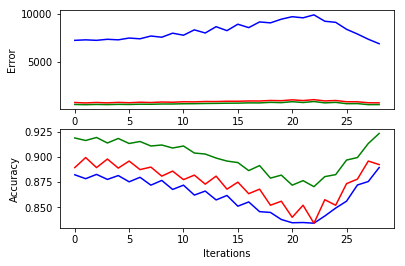

For lamda:  0.0001
Train accuracy at min err weights:  0.877722222222
Valid accuracy at min err weights:  0.898
Test accuracy at min err weights:  0.914


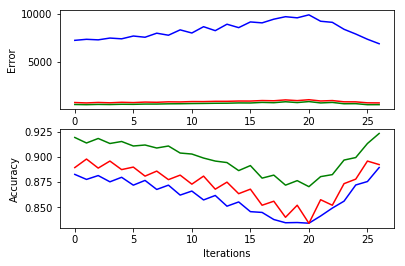

In [15]:
gradDescent([0.001, 0.0001], True, 0.001)